In [1]:
from  fiona import listlayers
import os

romaniaMaps=os.path.join('maps','romaniaMaps_3844_all.gpkg')

#layers in maps
listlayers(romaniaMaps)

['country',
 'cities',
 'rivers',
 'airports',
 'border',
 'states',
 'municipalities']

In [2]:
import os
import geopandas as gpd

states=gpd.read_file(romaniaMaps,layer='states')
municipalities=gpd.read_file(romaniaMaps,layer='municipalities')
airports=gpd.read_file(romaniaMaps,layer='airports')
rivers=gpd.read_file(romaniaMaps,layer='rivers')
border=gpd.read_file(romaniaMaps,layer='border')

In [3]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()
#crs no proyectado: 4326

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [5]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [6]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# no esta proyectado

# subset:
seaports_ro=seaports[seaports['Country Code']=='Romania'].copy()

# reset indexes
seaports_ro.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ro_3844=seaports_ro.to_crs(3844) # proyectado

In [7]:
print(airports.columns)

Index(['name', 'kind', 'latitude_deg', 'longitude_deg', 'elevation_ft',
       'region_name', 'municipality', 'geometry'],
      dtype='object')


<Axes: >

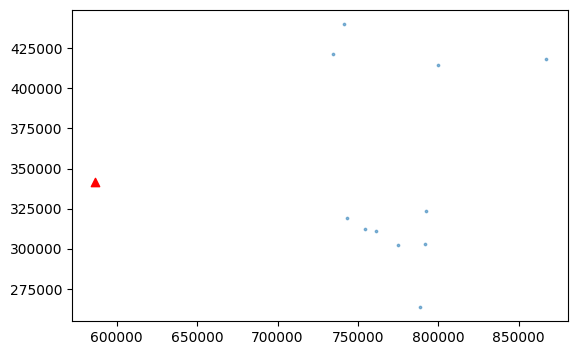

In [18]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_ro_3844.plot(ax=base,alpha=0.5,markersize=3)

<Axes: >

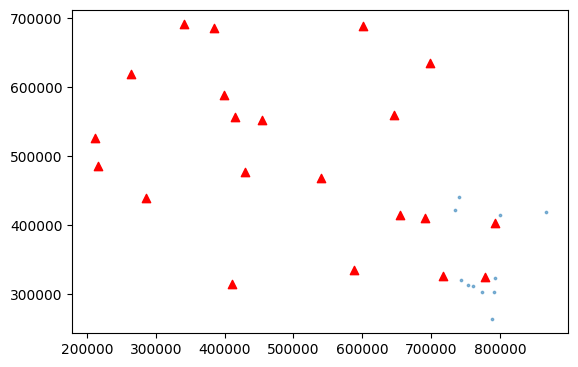

In [11]:
# subsetting
mediumAirports=airports[airports['kind']=='medium_airport'] 
mediumAirports.reset_index(drop=True, inplace=True)

#plotting
base=mediumAirports.plot(color='red',marker="^")
seaports_ro_3844.plot(ax=base,alpha=0.5,markersize=3)

In [12]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal' in km
largeAirports.iloc[0].geometry.distance(seaports_ro_3844.iloc[0].geometry)/1000
#geometry para saber la distancia de un punto a otro punto. la distancia sale en km

212.66961528356208

In [19]:
#Hallando 
seaports_ro_3844.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Henri Coandă International Airport
portName,
Basarabi,192.523357
Braila,167.819613
Cernavoda,158.631942
Constanta,209.360296
Danube-Black Sea Canal,170.516918
Galati,183.462288
Mangalia,216.645003
Medgidia,177.415982
Midia,206.946168


In [21]:
seaports_ro_3844.set_index('portName').geometry.apply\
(lambda g: mediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

NameError: name 'medium_Airports' is not defined